In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [120]:
df = pd.read_csv("powerconsumption.csv");
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [121]:
features = ["Datatime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuesFlows"];
target = ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]

In [122]:
# check whether there is null values
# the data is clean so there must be any outliers


In [123]:
# gather the targets to be displyed in one graph:
power_consu = [df[i].to_numpy() for i in target];

In [124]:
# Define a custom tick formatter function
def format_y_axis(value, _):
    res = 0;
    if value >= 1000:
        value /= 1000;
        res = f'{int(value)}k';
    else:
        res = str(int(value));
    
    return f'{res} wh';


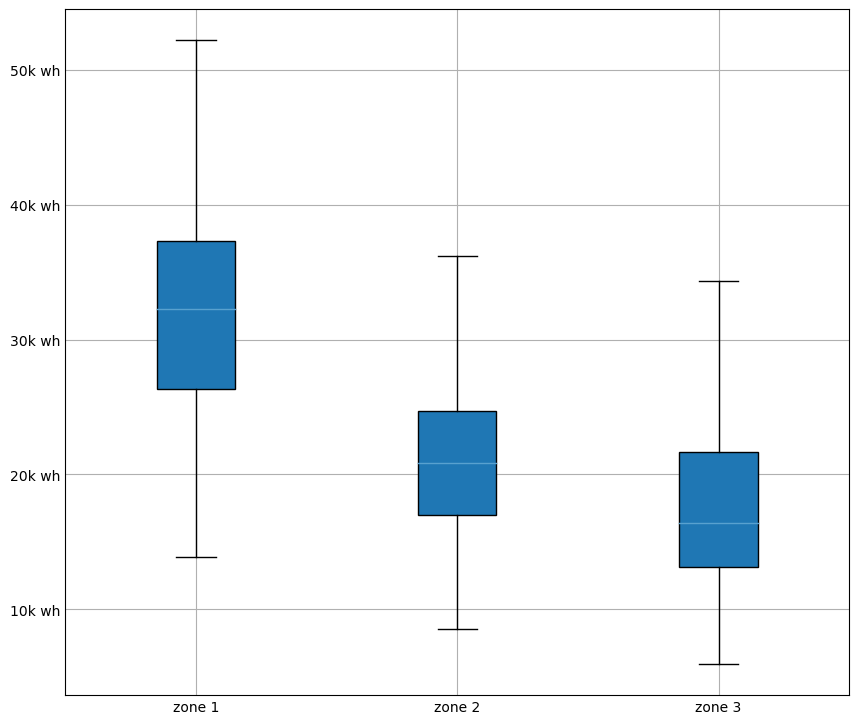

In [125]:
# plot the distrubtion of target in diffrenet zones
fig, ax = plt.subplots(figsize=(8,7));
ax.boxplot(power_consu, labels = ["zone 1", "zone 2", "zone 3"] ,patch_artist=True, showmeans=False, showfliers=False);
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis));
plt.show();

# rem: 

364


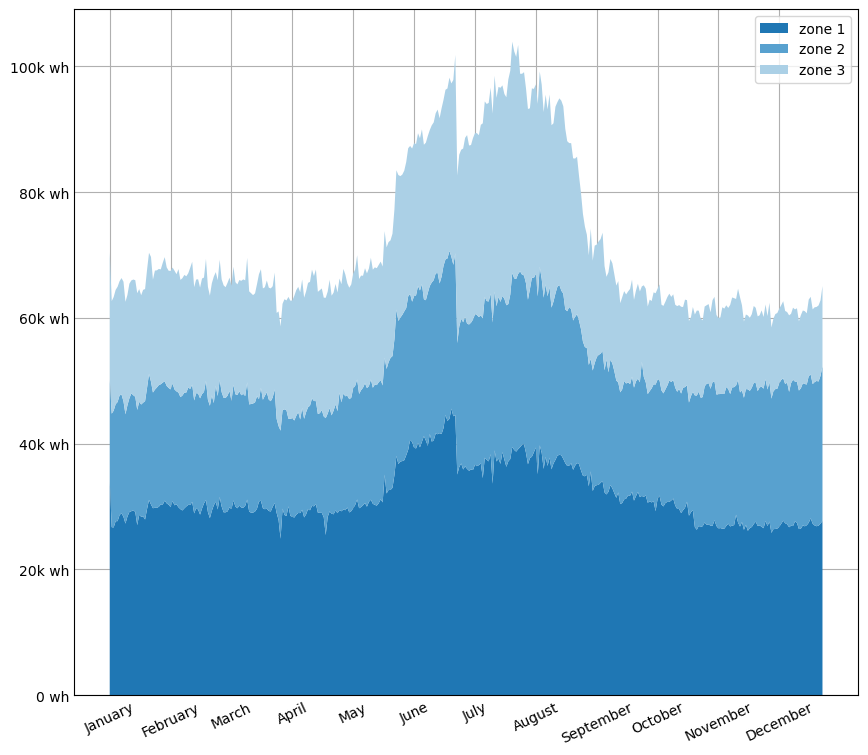

In [138]:
# graph the data along the year to see how the power consumption deve
# reduce the data instead of 10 window we will make 24h window
NEW_WINDOW=6*24 # each day at 0:00 clock
hour_con = [zone[::NEW_WINDOW] for zone in power_consu]


x = df["Datetime"].to_numpy()[::NEW_WINDOW];
y = np.vstack(hour_con);


# set tickets intervall
print(len(x))
x_tick_positions = range(0, len(x), 31)
x_tick_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(figsize=(8,7));
ax.stackplot(x, y, labels = ["zone 1", "zone 2", "zone 3"]);
plt.legend()
plt.xticks(x_tick_positions, x_tick_labels, rotation=25)  # Adjust rotation as needed for readability
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis));

plt.show();


# rem:

In [145]:
matrix = df.corr()
print(matrix)
matrix.to_latex(index=True, float_format="%.2f"); # latex code table

#rem:

                        Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Temperature                1.000000 -0.460243   0.477109             0.460294   
Humidity                  -0.460243  1.000000  -0.135853            -0.468138   
WindSpeed                  0.477109 -0.135853   1.000000             0.133733   
GeneralDiffuseFlows        0.460294 -0.468138   0.133733             1.000000   
DiffuseFlows               0.196522 -0.256886  -0.000972             0.564718   
PowerConsumption_Zone1     0.440221 -0.287421   0.167444             0.187965   
PowerConsumption_Zone2     0.382428 -0.294961   0.146413             0.157223   
PowerConsumption_Zone3     0.489527 -0.233022   0.278641             0.063376   

                        DiffuseFlows  PowerConsumption_Zone1  \
Temperature                 0.196522                0.440221   
Humidity                   -0.256886               -0.287421   
WindSpeed                  -0.000972                0.167444   
GeneralDiffuse

/tmp/ipykernel_190/1229128515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()
/tmp/ipykernel_190/1229128515.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  matrix.to_latex(index=True, float_format="%.2f"); # latex code table
